In [44]:
import sys
import os

# Add the root directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from dsa_analysis import load_config, visualize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interpolate
import main
from mambapy.mamba_lm import MambaLM, MambaLMConfig
from mambapy.mamba import Mamba, MambaConfig, RMSNorm
import ast
import DSA
import copy
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of main.representation failed: Traceback (most recent call last):
  File "/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/repal-8PB6Q6y1-py3.11/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/repal-8PB6Q6y1-py3.11/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniforge/base/envs/dsa/lib/python3.11/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 936, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1074, in get_code
  File "<frozen importlib._bootstrap_external>", line 1004, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in 

### Load config

In [45]:
config = load_config("../config.yaml")
taskset = "PDM"

In [46]:
def parse_model_info(model_name):
    model_name = model_name.replace(".pth", "")
    model_name = model_name.split("_")
    d_model = int(model_name[1])
    n_layers = int(model_name[2])
    learning_rate = float(model_name[3])
    batch_size = int(model_name[4])
    return d_model, n_layers, learning_rate, batch_size

In [47]:
def get_dynamics_mamba(
    d_model,
    n_layers,
    learning_rate,
    batch_size,
    model,
    group,
    taskset,
    device,
):
    # Load configuration and set hyperparameters
    config = load_config("../config.yaml")
    ruleset = config[taskset]["rules_analysis"][-1]
    all_rules = config[taskset]["rules_analysis"]

    hp = {
        "num_epochs": 50,
        "batch_size_train": batch_size,
        "learning_rate": learning_rate,
        "l2_weight": 0.0001,
        "mode": "test",
    }
    hp, _, _ = main.set_hyperparameters(
        model_dir="debug", hp=hp, ruleset=all_rules, rule_trains=ruleset
    )
    config = MambaLMConfig(
        d_model=d_model,
        n_layers=n_layers,
        vocab_size=hp["n_input"],
        pad_vocab_size_multiple=1,  # https://github.com/alxndrTL/mamba.py/blob/main/mamba_lm.py#L27
        pscan=True,
    )
    run_model = main.load_model_mamba(
        f"../models/mamba/{taskset}/{group}/{model}",
        hp,
        config,
        device=device,
    )
    h = main.representation(run_model, all_rules, rnn=False)
    return h

### Get dynamics to plot

In [48]:
model = "mamba_16_1_0.001_32_train.pth"

#### Pretrain unfrozen

In [49]:
group = "master"
device = "cpu"
d_model, n_layers, learning_rate, batch_size = parse_model_info(model)
curve_master = get_dynamics_mamba(
    d_model,
    n_layers,
    learning_rate,
    batch_size,
    model,
    group,
    taskset,
    device,
)

torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 8, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 8, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 8, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 8, 16])


In [50]:
group = "pretrain_frozen"
device = "cpu"
d_model, n_layers, learning_rate, batch_size = parse_model_info(model)
curve_pretrain_frozen = get_dynamics_mamba(
    d_model,
    n_layers,
    learning_rate,
    batch_size,
    model,
    group,
    taskset,
    device,
)

torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 8, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 8, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 8, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 8, 16])


In [51]:
group = "pretrain_unfrozen"
device = "cpu"
d_model, n_layers, learning_rate, batch_size = parse_model_info(model)
curve_pretrain_unfrozen = get_dynamics_mamba(
    d_model,
    n_layers,
    learning_rate,
    batch_size,
    model,
    group,
    taskset,
    device,
)

torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 8, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 8, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 8, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 8, 16])


In [52]:
group = "pretrain_basic_frozen"
device = "cpu"
d_model, n_layers, learning_rate, batch_size = parse_model_info(model)
curve_pretrain_basic_frozen = get_dynamics_mamba(
    d_model,
    n_layers,
    learning_rate,
    batch_size,
    model,
    group,
    taskset,
    device,
)

torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 8, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 32, 16])
torch.Size([220, 8, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 8, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 32, 16])
torch.Size([350, 8, 16])


In [53]:
curves = [curve_master, curve_pretrain_frozen, curve_pretrain_unfrozen, curve_pretrain_basic_frozen]
# normalize all the curves
# for i in range(len(curves)):
#     curves[i] = (curves[i] - np.mean(curves[i])) / np.std(curves[i])

In [54]:
# reduce again curves to 3 components only to visualize
curves_reduced_to_plot, explained_variance = main.compute_common_pca(curves, n_components=3)

len(h_list): 4
h_list[0].shape: torch.Size([200, 200, 16])
h_list[1].shape: torch.Size([200, 200, 16])
h_list[2].shape: torch.Size([200, 200, 16])
h_list[3].shape: torch.Size([200, 200, 16])
i: 0
i: 1
i: 2
i: 3


In [55]:
explained_variance

0.7033695317513933

#### Visualize the curves

In [56]:
# average each curve over second dimension
curves_averaged = [curve.mean(axis=1) for curve in curves_reduced_to_plot]
# curves_averaged = [curve for curve in curves_reduced_to_plot]

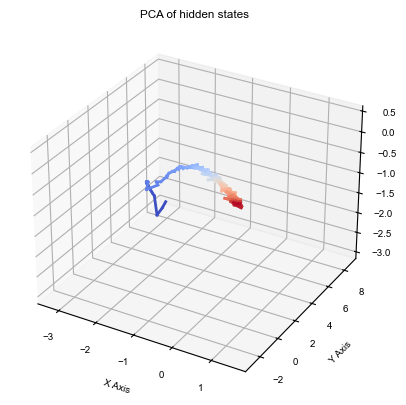

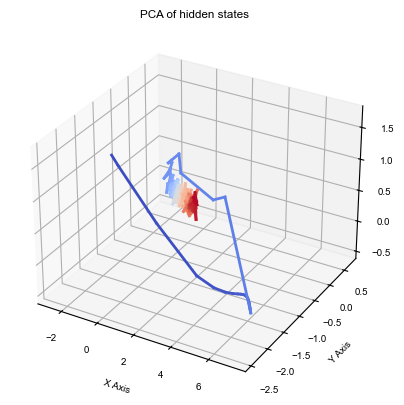

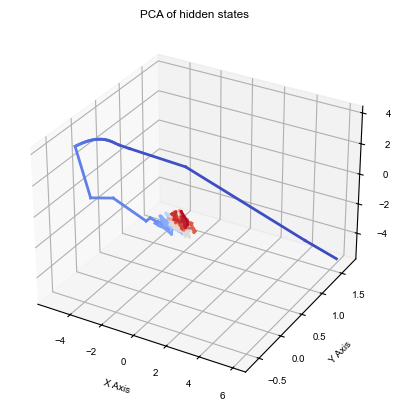

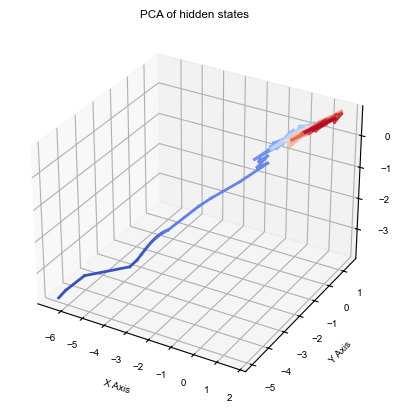

In [57]:
visualize(curves_averaged,title="PCA of hidden states")

In [58]:
dissimilarities = np.zeros((len(curves), len(curves)))
for i in range(len(curves)):
    for j in range(i, len(curves)):
        # compute DSA dissimilarity matrix
        # compute common pca between two curves
        curves_reduced, explained_variance = main.compute_common_pca(
            [curves[i], curves[j]], n_components=10
        )
        print(f"Explained variance between {i} and {j}: {explained_variance}")
        dsa_comp = DSA.DSA(
            curves_reduced[0],
            curves_reduced[1],
            # n_delays=config["dsa"]["n_delays"],
            n_delays=50,
            rank=100,
            # delay_interval=config["dsa"]["delay_interval"],
            delay_interval=3,
            verbose=True,
            iters=1000,
            lr=1e-2,
            device="cpu",
        )
        dis = dsa_comp.fit_score()
        dissimilarities[i, j] = dis

len(h_list): 2
h_list[0].shape: torch.Size([200, 200, 16])
h_list[1].shape: torch.Size([200, 200, 16])
i: 0
i: 1
Explained variance between 0 and 0: 0.9987995366674978
Computing Hankel matrix ...
Hankel matrix computed!
Computing SVD on Hankel matrix ...
SVD complete!
Computing least squares fits to HAVOK DMD ...
Least squares complete! 

Computing Hankel matrix ...
Hankel matrix computed!
Computing SVD on Hankel matrix ...
SVD complete!
Computing least squares fits to HAVOK DMD ...
Least squares complete! 

computing similarity between DMDs 0 and 0
Finished optimizing C
Finished optimizing C
len(h_list): 2
h_list[0].shape: torch.Size([200, 200, 16])
h_list[1].shape: torch.Size([200, 200, 16])
i: 0
i: 1
Explained variance between 0 and 1: 0.9902139719287355
Computing Hankel matrix ...
Hankel matrix computed!
Computing SVD on Hankel matrix ...
SVD complete!
Computing least squares fits to HAVOK DMD ...
Least squares complete! 

Computing Hankel matrix ...
Hankel matrix computed!
Computi

In [59]:
for i in range(len(curves)):
    for j in range(i):
        dissimilarities[i, j] = dissimilarities[j, i]

<Axes: >

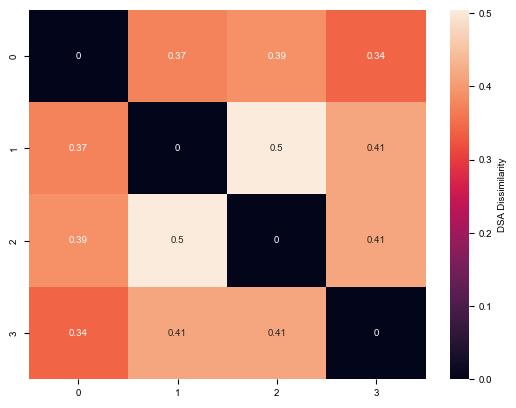

In [60]:
sns.heatmap(dissimilarities, annot=True, cbar_kws={"label": "DSA Dissimilarity"})

In [61]:
dissimilarities = np.zeros((len(curves), len(curves)))
for i in range(len(curves)):
    for j in range(i, len(curves)):
        # compute DSA dissimilarity matrix
        # compute common pca between two curves
        curves_reduced, explained_variance = main.compute_common_pca(
            [curves_averaged[i], curves_averaged[j]], n_components=5
        )
        print(f"Explained variance between {i} and {j}: {explained_variance}")
        dsa_comp = DSA.DSA(
            curves_reduced[0],
            curves_reduced[1],
            # n_delays=config["dsa"]["n_delays"],
            n_delays=33,
            rank=100,
            # delay_interval=config["dsa"]["delay_interval"],
            delay_interval=6,
            verbose=True,
            iters=1000,
            lr=1e-2,
            device="cpu",
        )
        dis = dsa_comp.fit_score()
        dissimilarities[i, j] = dis

len(h_list): 2
h_list[0].shape: torch.Size([200, 3])
h_list[1].shape: torch.Size([200, 3])


RuntimeError: shape '[200, 6, 5]' is invalid for input of size 1000